##ggplot
- Throughout the series, we will create plots with the ggplot2 package. ggplot2 is part of the tidyverse suite of packages, which you can load with library(tidyverse).
- Note that you can also load ggplot2 alone using the command library(ggplot2), instead of loading the entire tidyverse.
- ggplot2 uses a grammar of graphics to break plots into building blocks that have intuitive syntax, making it easy to create relatively complex and aesthetically pleasing plots with relatively simple and readable code.
- ggplot2 is designed to work exclusively with tidy data (rows are observations and columns are variables).

##Graph Components
- Plots in ggplot2 consist of 3 main components:
    - Data: The dataset being summarized
    - Geometry: The type of plot (scatterplot, boxplot, barplot, histogram, qqplot, smooth density, etc.)
    - Aesthetic mapping: Variables mapped to visual cues, such as x-axis and y-axis values and color
- There are additional components:
    - Scale
    - Labels, Title, Legend
    - Theme/Style

##Creating a New Plot
- You can associate a dataset x with a ggplot object with any of the 3 commands:
      ggplot(data = x)
      ggplot(x)
      x %>% ggplot()
- You can assign a ggplot object to a variable. If the object is not assigned to a variable, it will automatically be displayed.
- You can display a ggplot object assigned to a variable by printing that variable.

In [18]:
install.packages("dslabs")
install.packages("ggplot2")
library(tidyverse)
library(dslabs)
library(ggplot2)
data(murders)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
head(murders)



,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
4,Arkansas,AR,South,2915918,93
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65


In [ ]:
#emptry
ggplot(data = murders)
murders %>% ggplot()

##Layer
- In ggplot2, graphs are created by adding layers to the ggplot object:
DATA %>% ggplot() + LAYER_1 + LAYER_2 + ... + LAYER_N
- The geometry layer defines the plot type and takes the format geom_X where X is the plot type.
- Aesthetic mappings describe how properties of the data connect with features of the graph (axis position, color, size, etc.) Define aesthetic mappings with the aes() function.
- aes() uses variable names from the object component (for example, total rather than murders$total).
- geom_point() creates a scatterplot and requires x and y aesthetic mappings. 
- geom_text() and geom_label() add text to a scatterplot and require x, y, and label aesthetic mappings.
- To determine which aesthetic mappings are required for a geometry, read the help file for that geometry.
- You can add layers with different aesthetic mappings to the same graph.

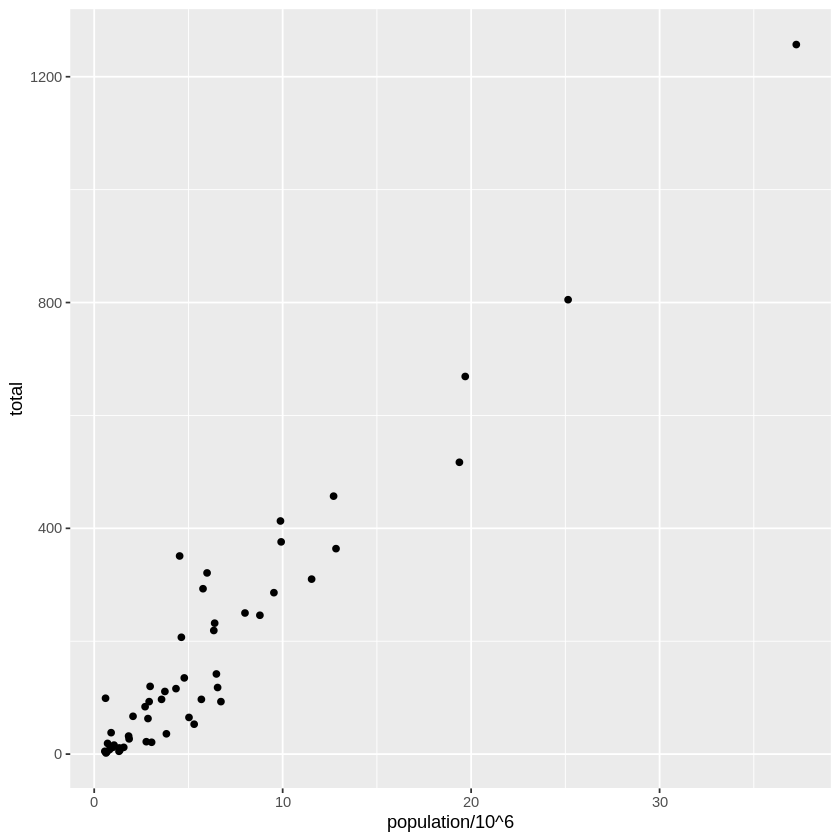

In [24]:
library(tidyverse)
library(dslabs)
data(murders)

murders %>% ggplot() +
    geom_point(aes(x = population/10^6, y = total))


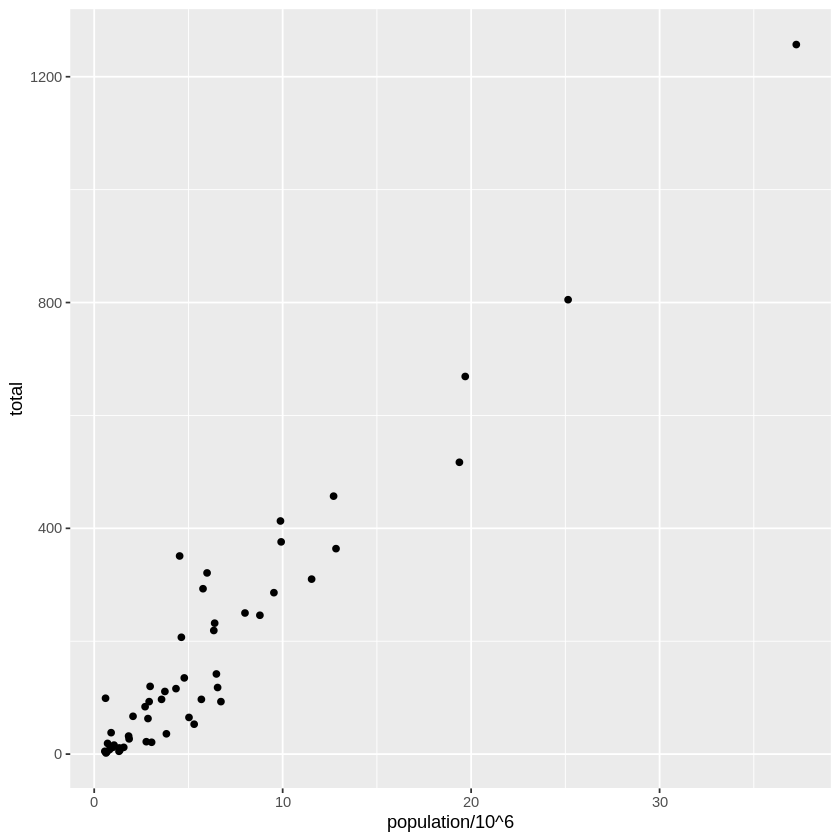

In [25]:
# add points layer to predefined ggplot object
p <- ggplot(data = murders)
p + geom_point(aes(population/10^6, total))


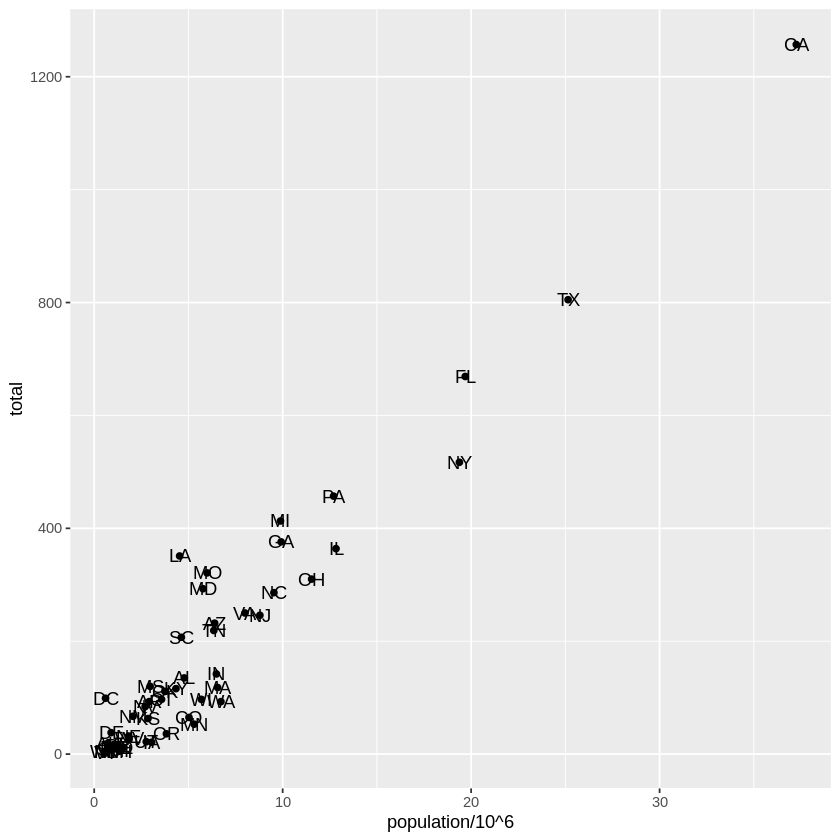

In [26]:
# add text layer to scatterplot
p + geom_point(aes(population/10^6, total)) +
    geom_text(aes(population/10^6, total, label = abb))

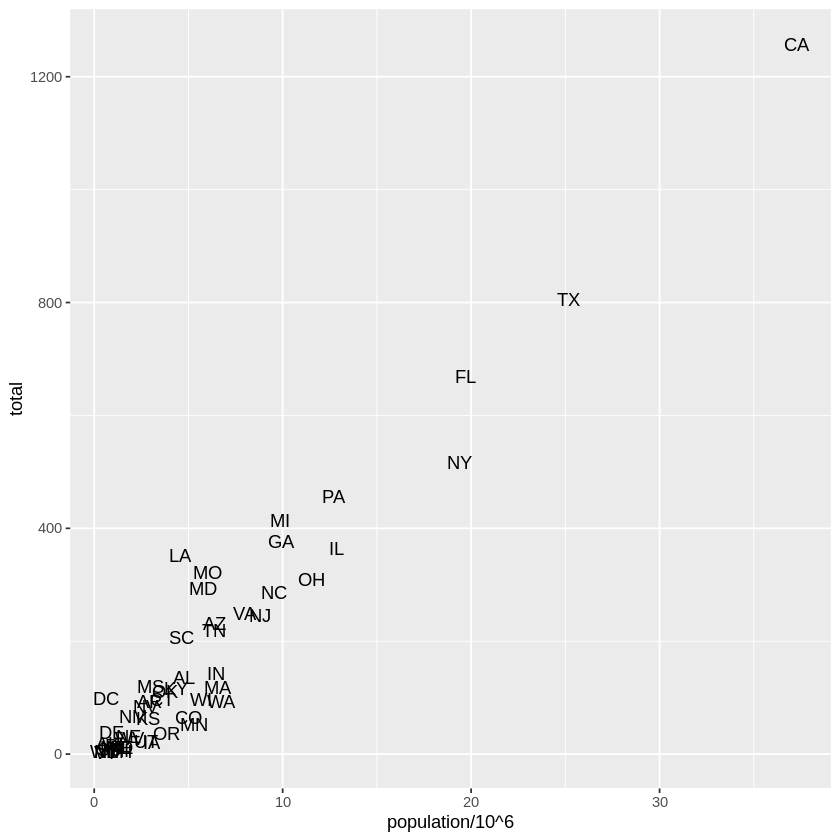

In [30]:
# no error from this call
p_test <- p + geom_text(aes(population/10^6, total, label = abb))
p_test
# error - "abb" is not a globally defined variable and cannot be found outside of aes
#p_test <- p + geom_text(aes(population/10^6, total), label = abb)

##Tinkering
- You can modify arguments to geometry functions other than aes() and the data. Additional arguments can be found in the documentation for each geometry.
- These arguments are not aesthetic mappings: they affect all data points the same way.
- Global aesthetic mappings apply to all geometries and can be defined when you initially call ggplot(). All the geometries added as layers will default to this mapping. Local aesthetic mappings add additional information or override the default mappings.

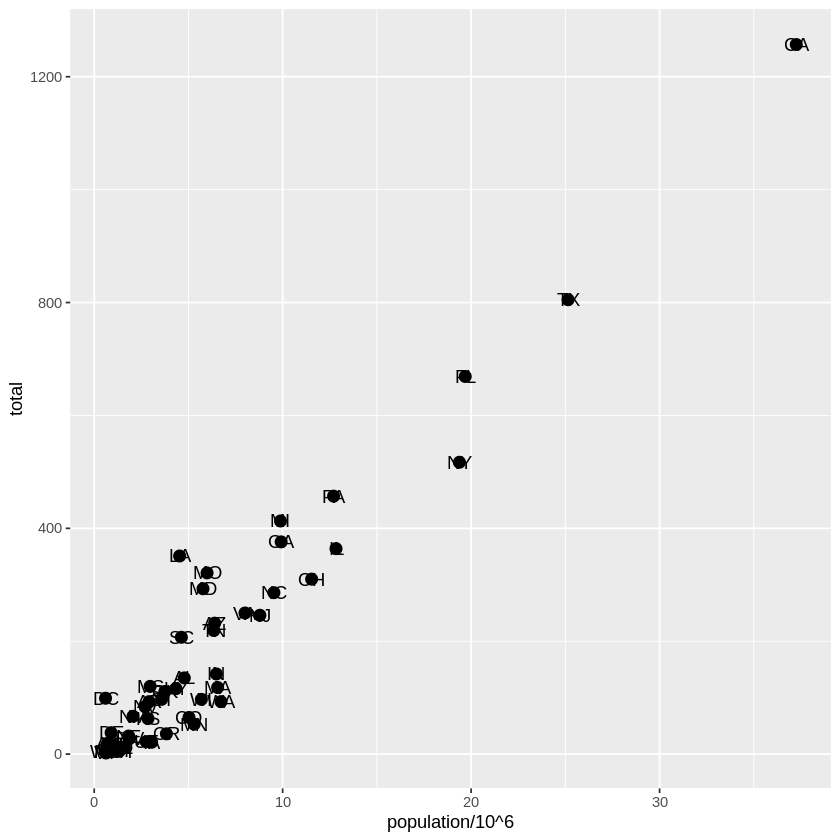

In [32]:
# change the size of the points
p + geom_point(aes(population/10^6, total), size = 3) +
    geom_text(aes(population/10^6, total, label = abb))
    


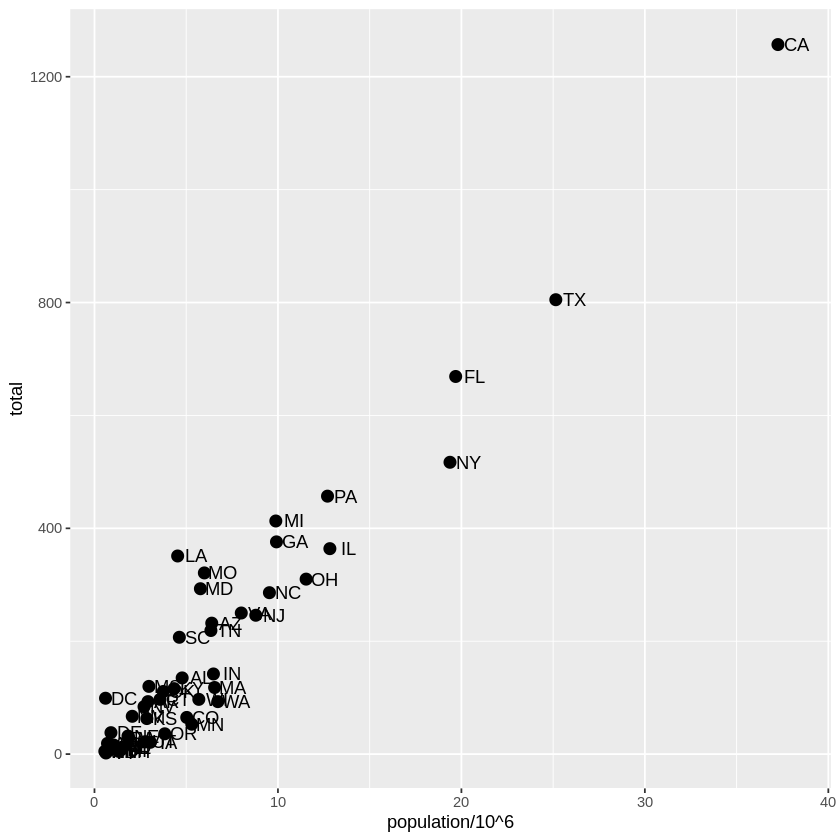

In [33]:
# move text labels slightly to the right
p + geom_point(aes(population/10^6, total), size = 3) +
    geom_text(aes(population/10^6, total, label = abb), nudge_x = 1)


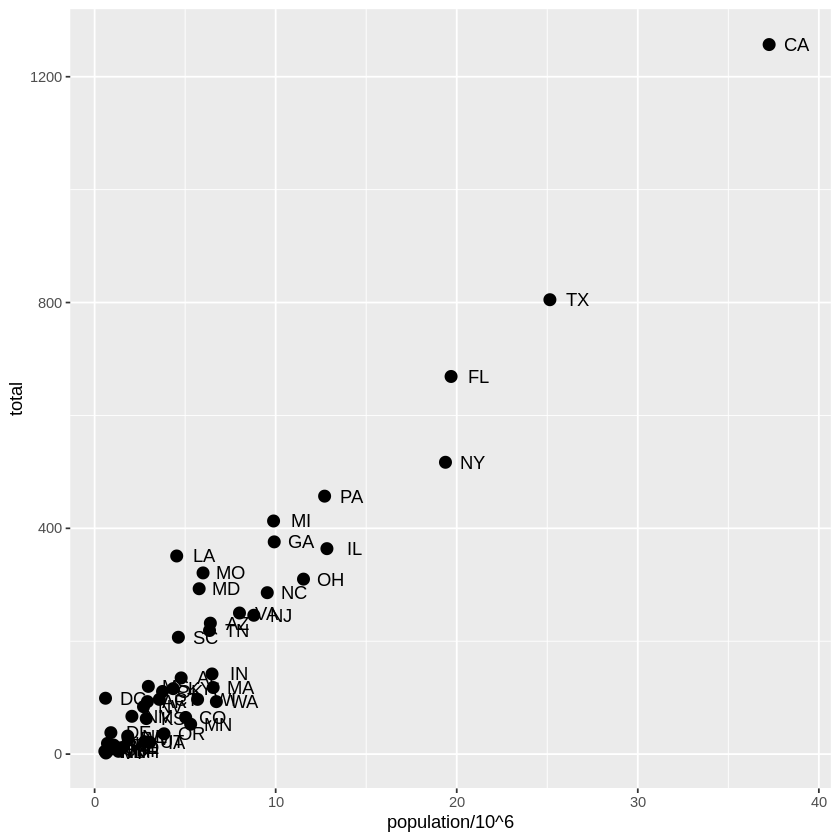

In [34]:
    
# simplify code by adding global aesthetic
p <- murders %>% ggplot(aes(population/10^6, total, label = abb))
p + geom_point(size = 3) +
    geom_text(nudge_x = 1.5)
    


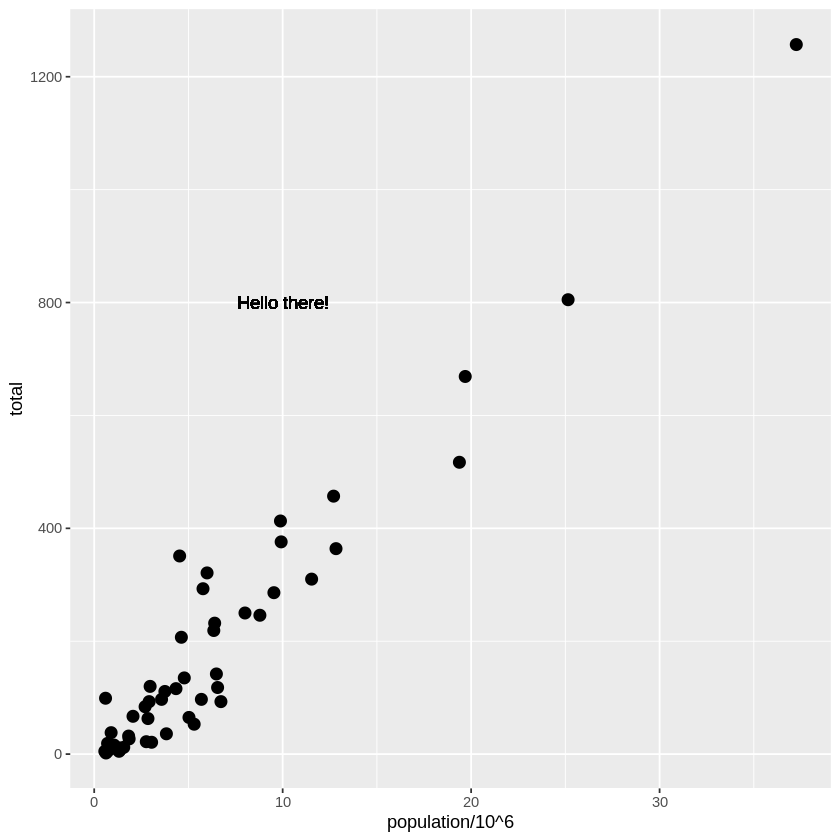

In [35]:
# local aesthetics override global aesthetics
p + geom_point(size = 3) +
    geom_text(aes(x = 10, y = 800, label = "Hello there!"))

##Scales, Labels, and Colors
- Convert the x-axis to log scale with scale_x_continuous(trans = "log10") or scale_x_log10(). Similar functions exist for the y-axis.
- Add axis titles with xlab() and ylab() functions. Add a plot title with the ggtitle() function.
- Add a color mapping that colors points by a variable by defining the col argument within aes(). To color all points the same way, define col outside of aes().
- Add a line with the geom_abline() geometry. geom_abline() takes arguments slope (default = 1) and intercept (default = 0). Change the color with col or color and line type with lty.
- Placing the line layer after the point layer will overlay the line on top of the points. To overlay points on the line, place the line layer before the point layer.
- There are many additional ways to tweak your graph that can be found in the ggplot2 documentation, cheat sheet, or on the internet. For example, you can change the legend title with scale_color_discrete().

In [36]:
#1.Code: Log-scale the x- and y-axis
# define p
library(tidyverse)
library(dslabs)
data(murders)
p <- murders %>% ggplot(aes(population/10^6, total, label = abb))


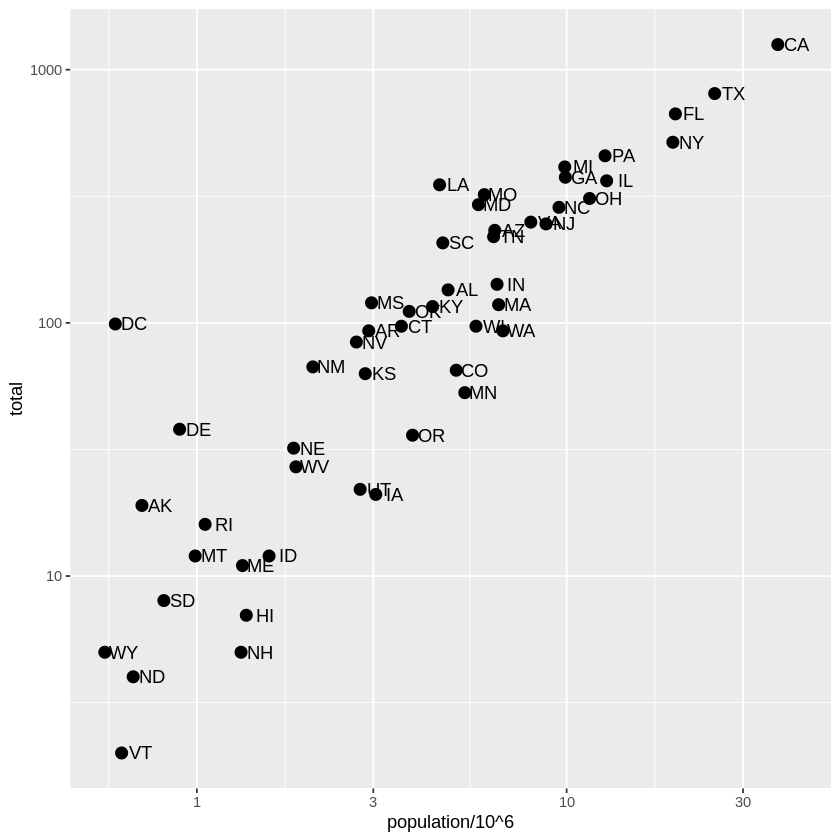

In [37]:

# log base 10 scale the x-axis and y-axis
p + geom_point(size = 3) +
    geom_text(nudge_x = 0.05) +
    scale_x_continuous(trans = "log10") +
    scale_y_continuous(trans = "log10")
 

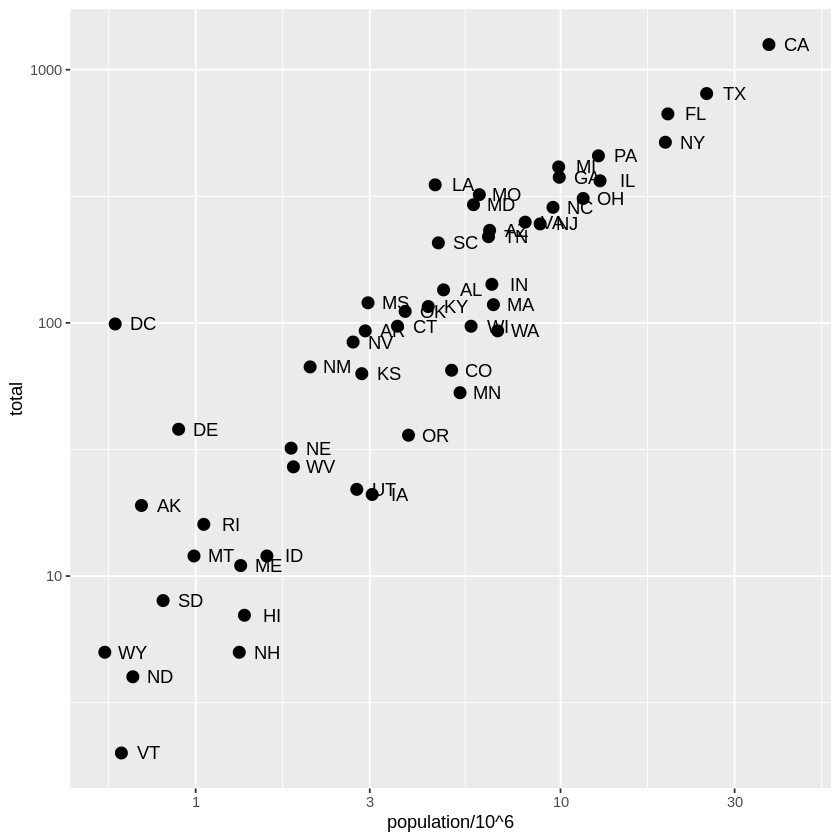

In [38]:
   
# efficient log scaling of the axes
p + geom_point(size = 3) +
    geom_text(nudge_x = 0.075) +
    scale_x_log10() +
    scale_y_log10()


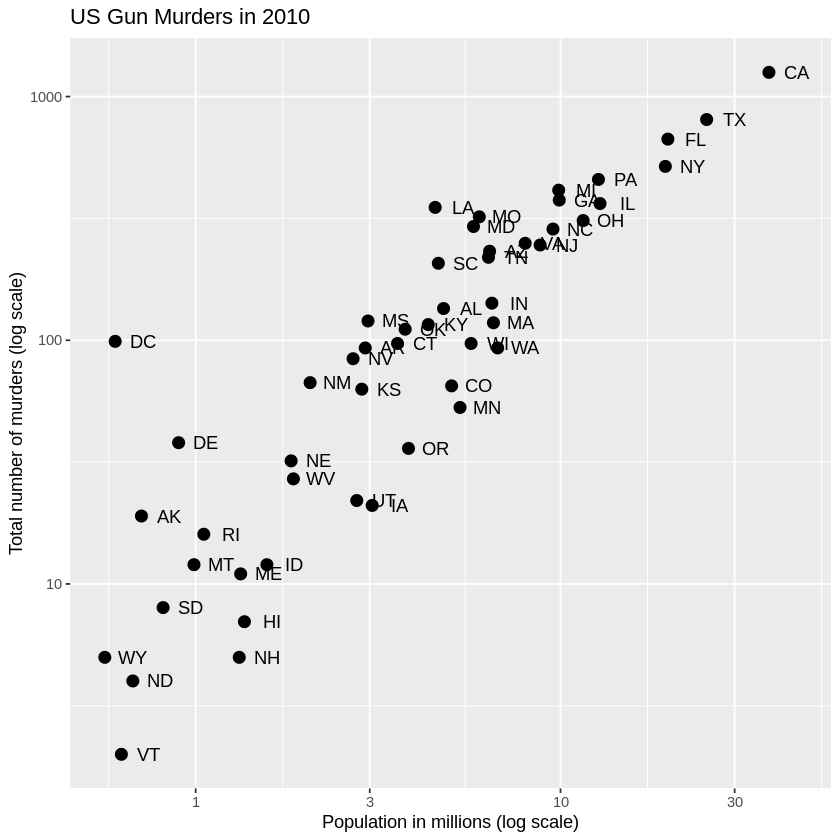

In [39]:
#2.Code: Add labels and title
p + geom_point(size = 3) +
    geom_text(nudge_x = 0.075) +
    scale_x_log10() +
    scale_y_log10() +
    xlab("Population in millions (log scale)") +
    ylab("Total number of murders (log scale)") +
    ggtitle("US Gun Murders in 2010")


In [40]:
#3.Code: Change color of the points
# redefine p to be everything except the points layer
p <- murders %>%
    ggplot(aes(population/10^6, total, label = abb)) +
    geom_text(nudge_x = 0.075) +
    scale_x_log10() +
    scale_y_log10() +
    xlab("Population in millions (log scale)") +
    ylab("Total number of murders (log scale)") +
    ggtitle("US Gun Murders in 2010")
 

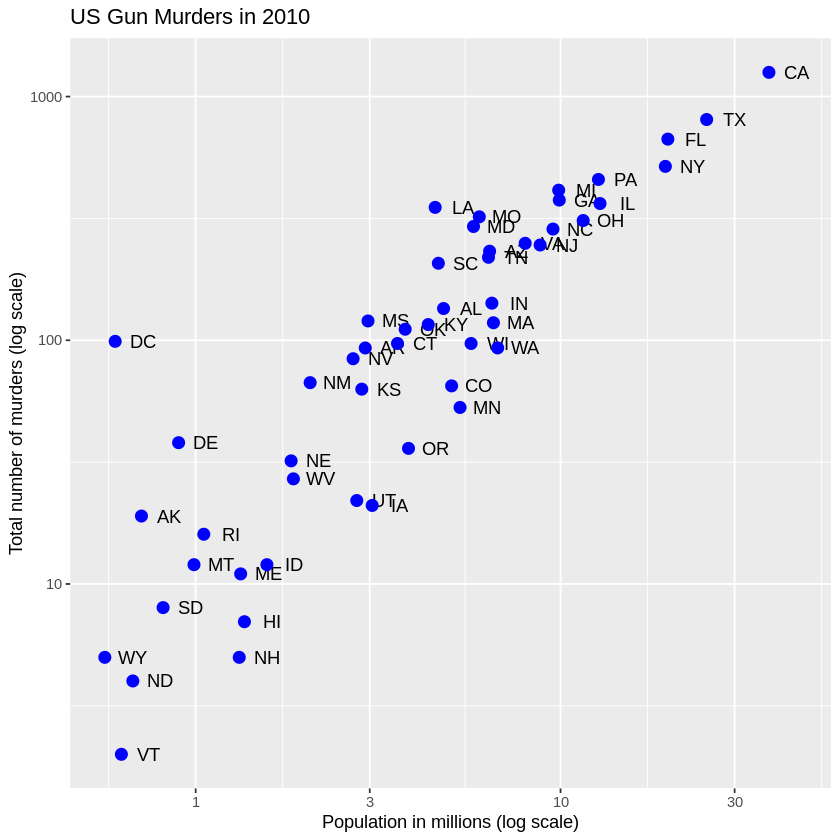

In [41]:
   
# make all points blue
p + geom_point(size = 3, color = "blue")


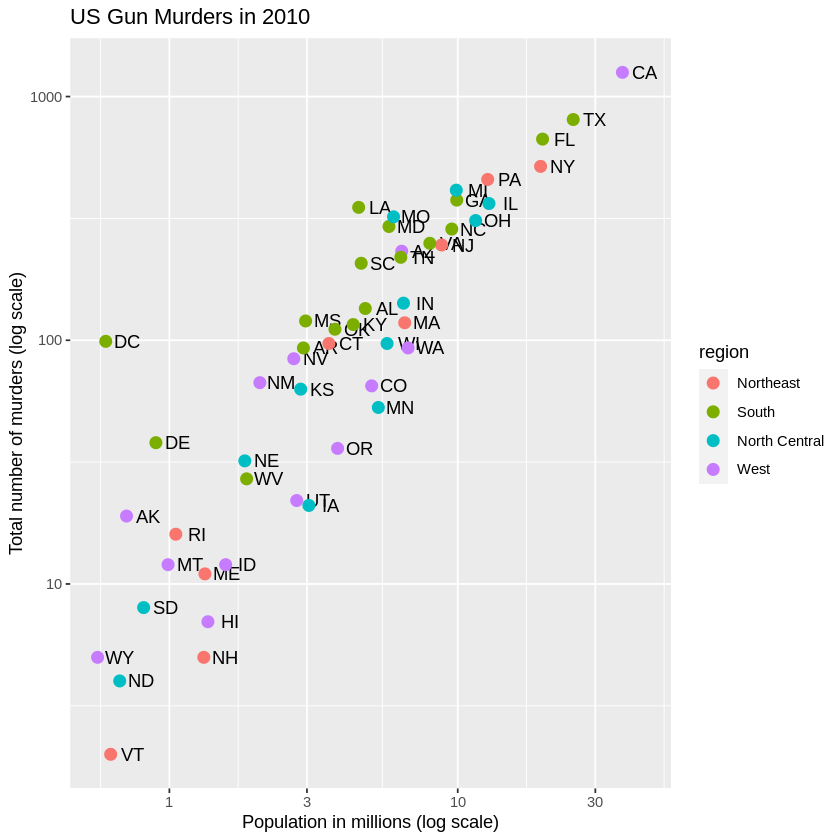

In [44]:

# color points by region
p + geom_point(aes(col = region), size = 3)



In [45]:
#4.Code: Add a line with average murder rate
# define average murder rate
r <- murders %>%
    summarize(rate = sum(total) / sum(population) * 10^6) %>%
    pull(rate)


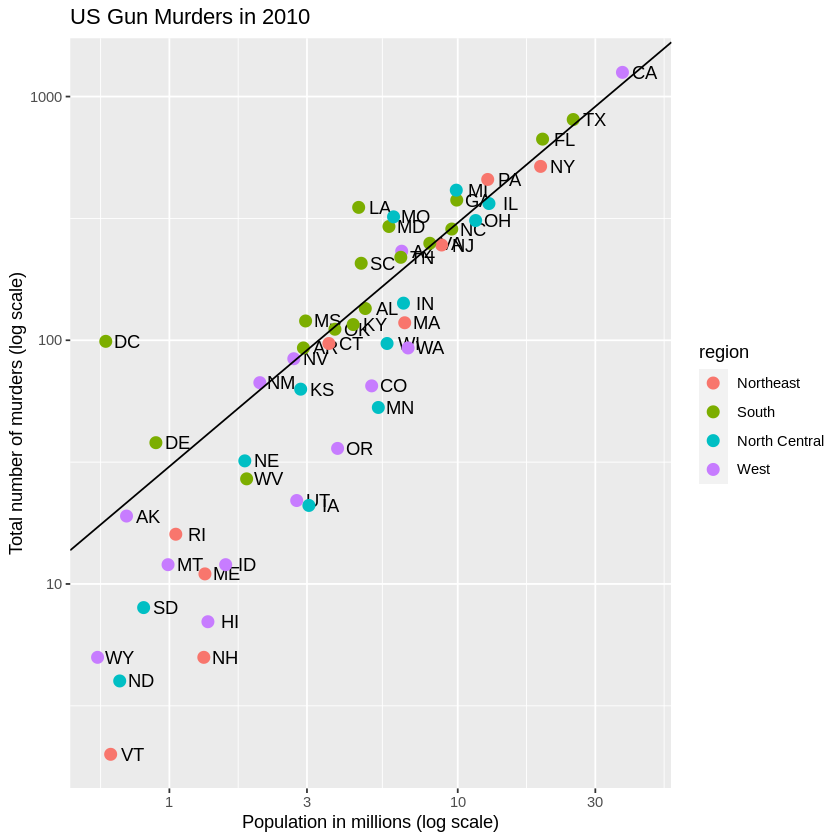

In [46]:
    
# basic line with average murder rate for the country
p + geom_point(aes(col = region), size = 3) +
    geom_abline(intercept = log10(r))    # slope is default of 1


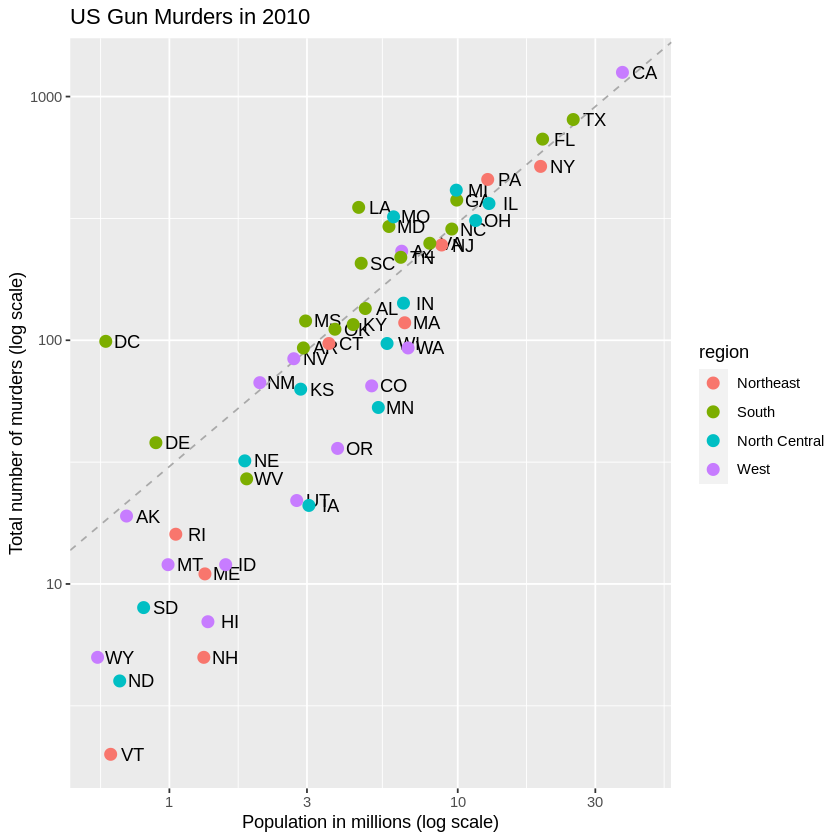

In [49]:
    # change line to dashed and dark grey, line under points
p + geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") +
    geom_point(aes(col = region), size = 3)


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



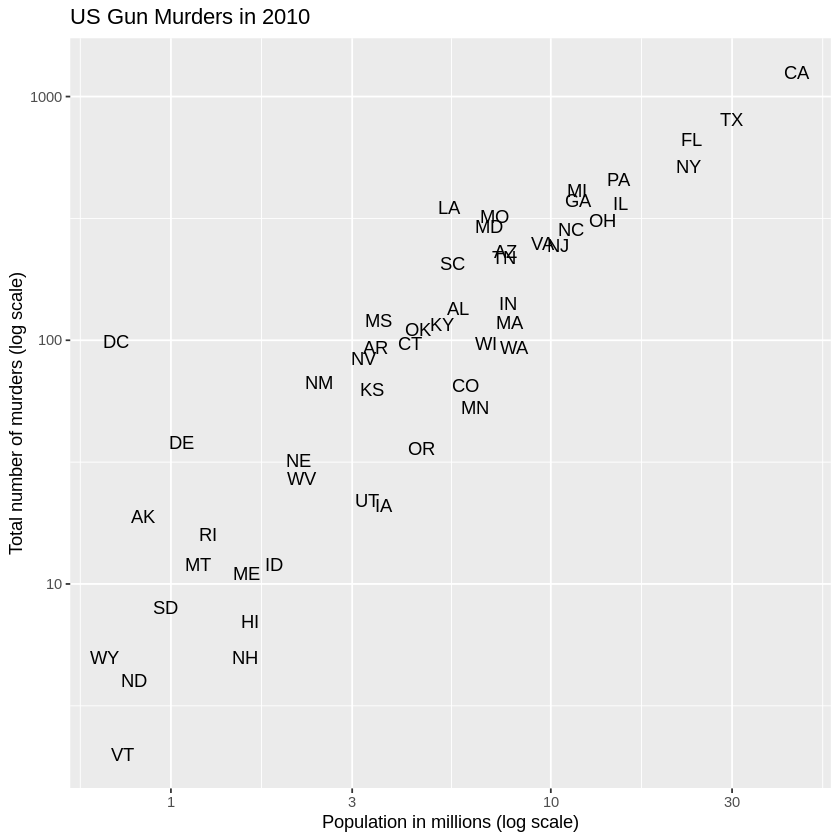

In [52]:
#5.Code: Change legend title
p <- p + scale_color_discrete(name = "Region")    # capitalize legend title
p

##Add-on Packages
- The style of a ggplot graph can be changed using the theme() function.
- The ggthemes package adds additional themes.
- The ggrepel package includes a geometry that repels text labels, ensuring they do not overlap with each other: geom_text_repel().

In [53]:
#1.Code: Adding themes
# theme used for graphs in the textbook and course
library(dslabs)
ds_theme_set()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



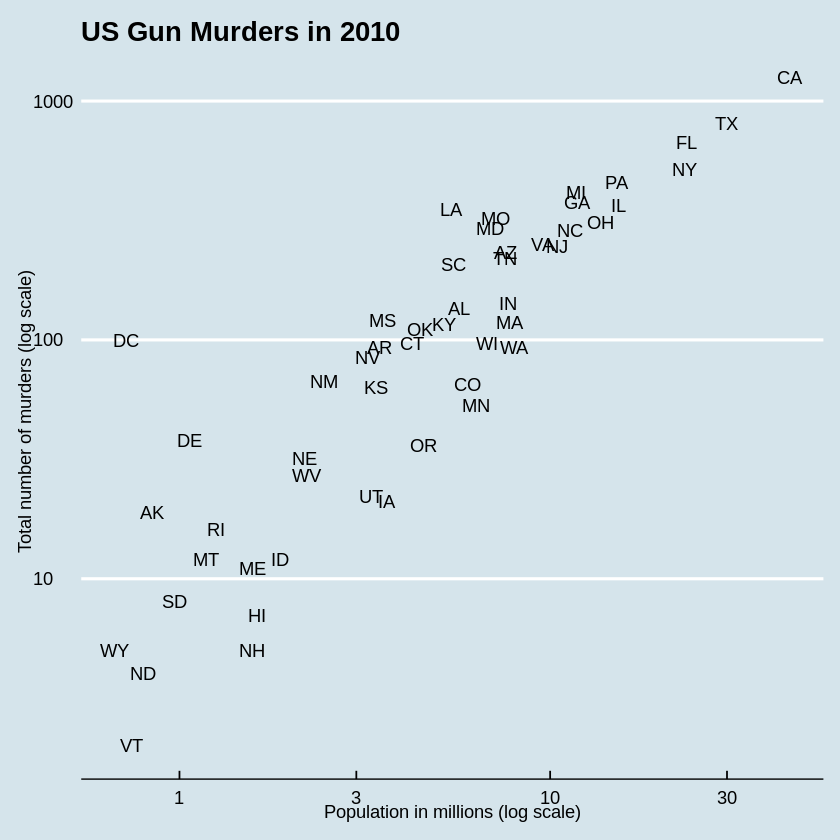

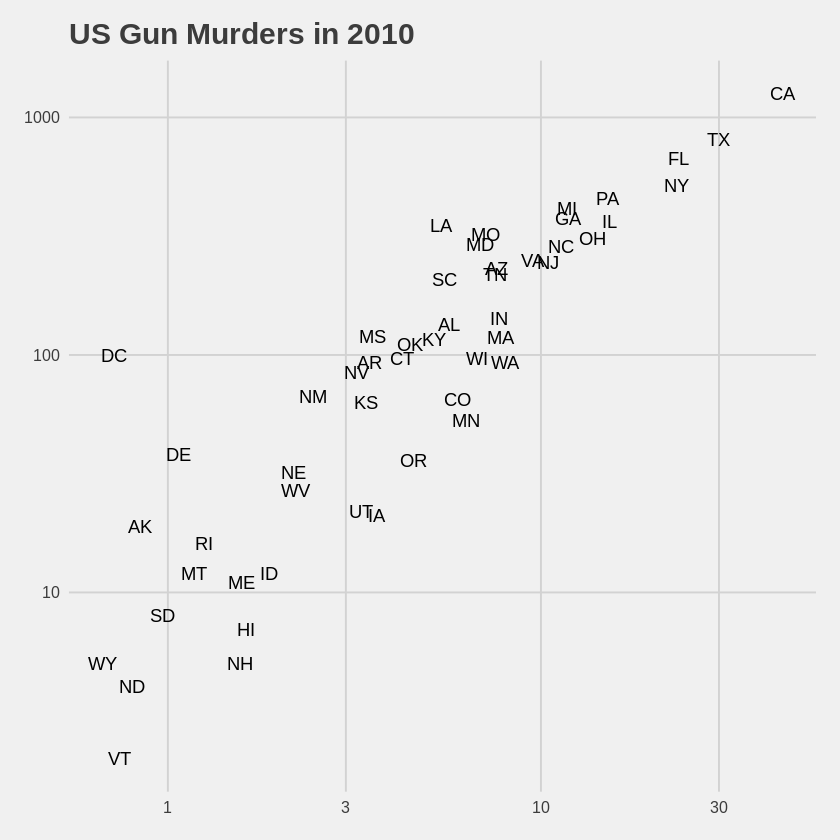

In [58]:
# themes from ggthemes
install.packages("ggthemes")
install.packages("ggrepel")
library(ggthemes)
p + theme_economist()    # style of the Economist magazine
p + theme_fivethirtyeight()    # style of the FiveThirtyEight website


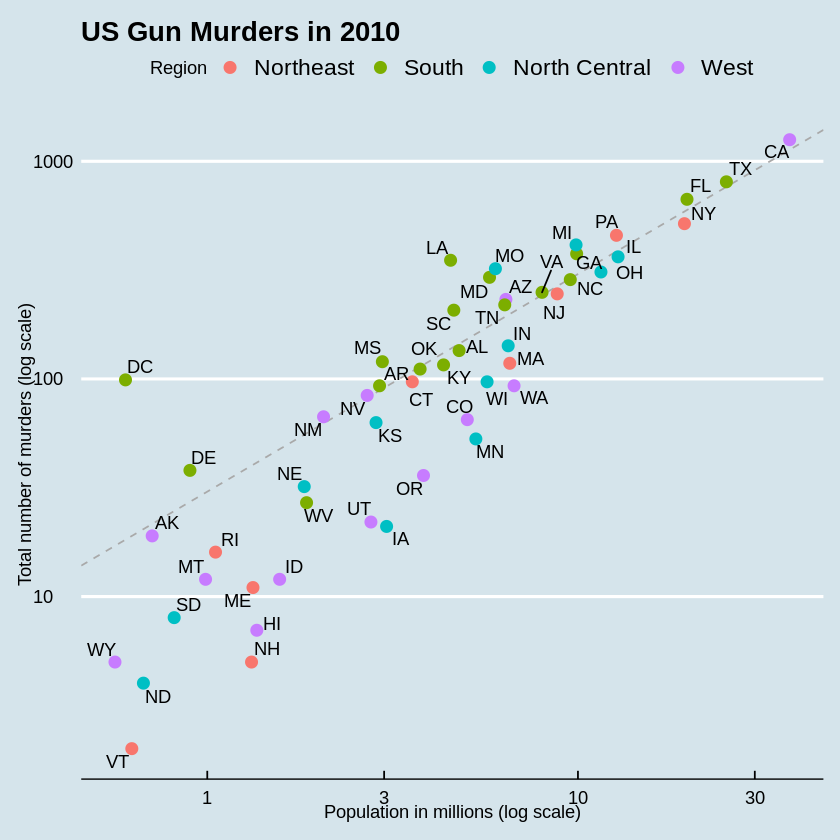

In [59]:
#2.Code: Putting it all together to assemble the plot
# load libraries
library(tidyverse)
library(ggrepel)
library(ggthemes)
library(dslabs)
data(murders)

# define the intercept
r <- murders %>%
    summarize(rate = sum(total) / sum(population) * 10^6) %>%
    .$rate
    
# make the plot, combining all elements
murders %>%
    ggplot(aes(population/10^6, total, label = abb)) +
    geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") +
    geom_point(aes(col = region), size = 3) +
    geom_text_repel() +
    scale_x_log10() +
    scale_y_log10() +
    xlab("Population in millions (log scale)") +
    ylab("Total number of murders (log scale)") +
    ggtitle("US Gun Murders in 2010") +
    scale_color_discrete(name = "Region") +
    theme_economist()

#Other examble
- geom_histogram() creates a histogram. Use the binwidth argument to change the width of bins, the fill argument to change the bar fill color, and the col argument to change bar outline color.
- geom_density() creates smooth density plots. Change the fill color of the plot with the fill argument.
- geom_qq() creates a quantile-quantile plot. This geometry requires the sample argument. By default, the data are compared to a standard normal distribution with a mean of 0 and standard deviation of 1. This can be changed with the dparams argument, or the sample data can be scaled.
- Plots can be arranged adjacent to each other using the grid.arrange() function from the gridExtra package. First, create the plots and save them to objects (p1, p2, ...). Then pass the plot objects to grid.arrange().

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



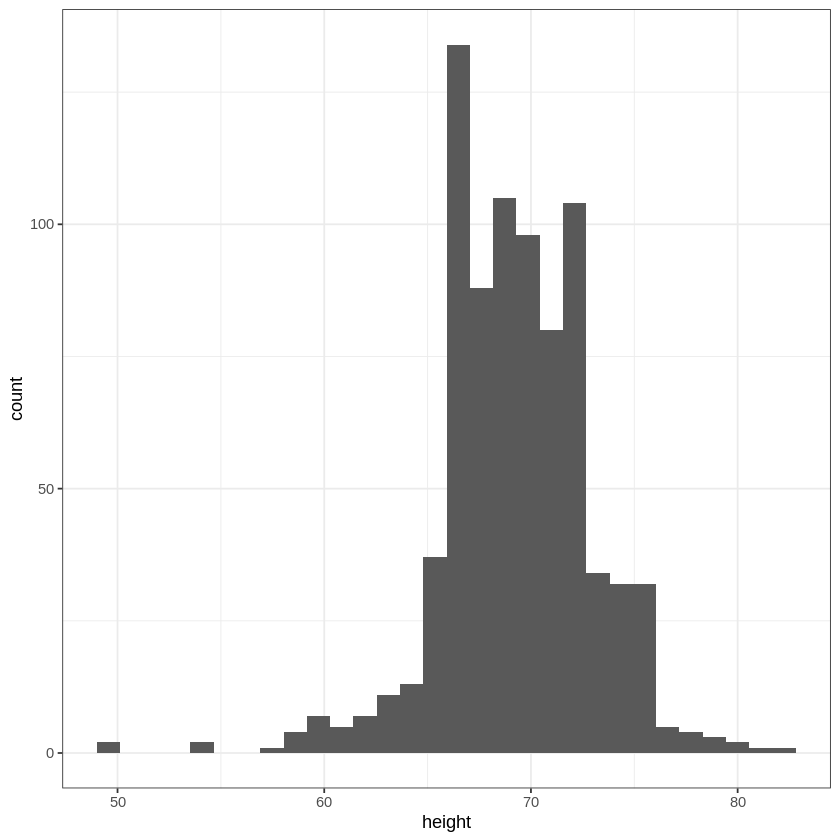

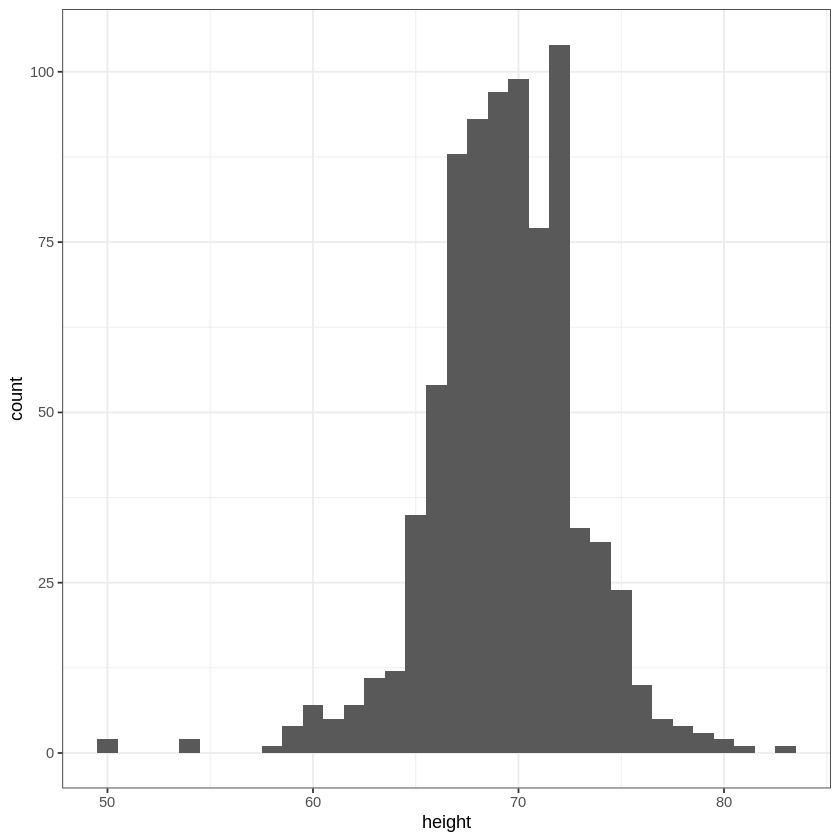

In [60]:
#1. Code: Histograms in ggplot2
# load heights data
library(tidyverse)
library(dslabs)
data(heights)

# define p
p <- heights %>%
    filter(sex == "Male") %>%
    ggplot(aes(x = height))
    
# basic histograms
p + geom_histogram()
p + geom_histogram(binwidth = 1)


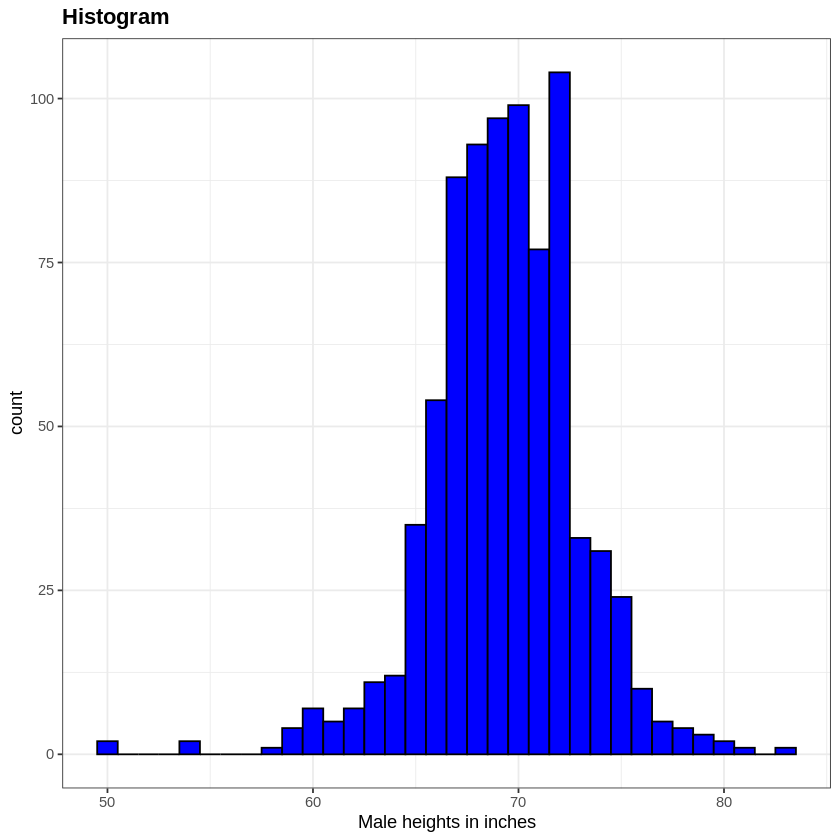

In [61]:

# histogram with blue fill, black outline, labels and title
p + geom_histogram(binwidth = 1, fill = "blue", col = "black") +
    xlab("Male heights in inches") +
    ggtitle("Histogram")


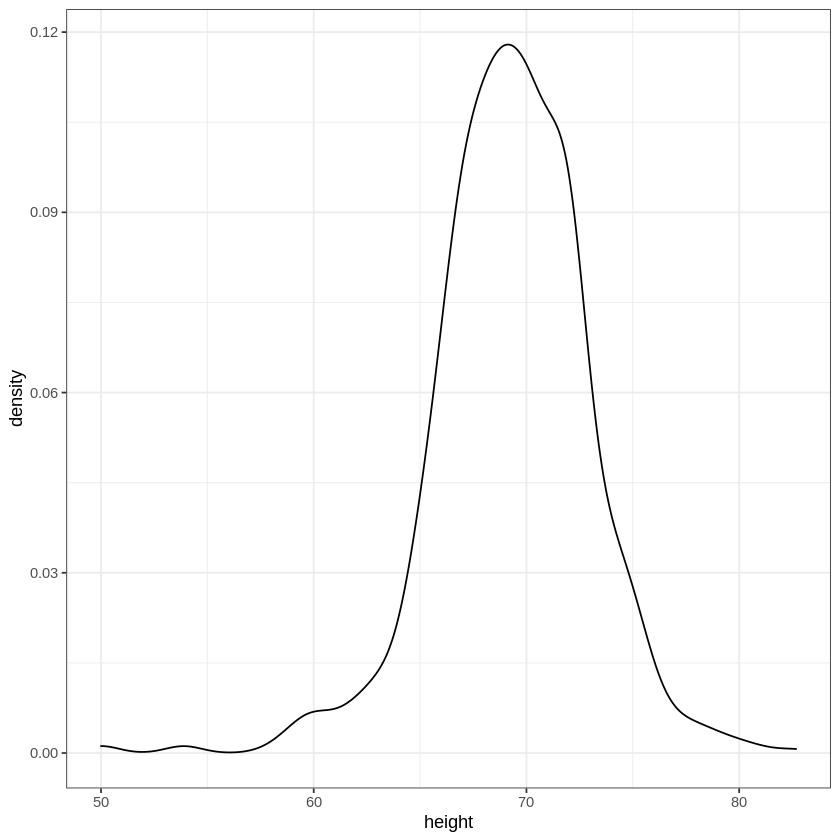

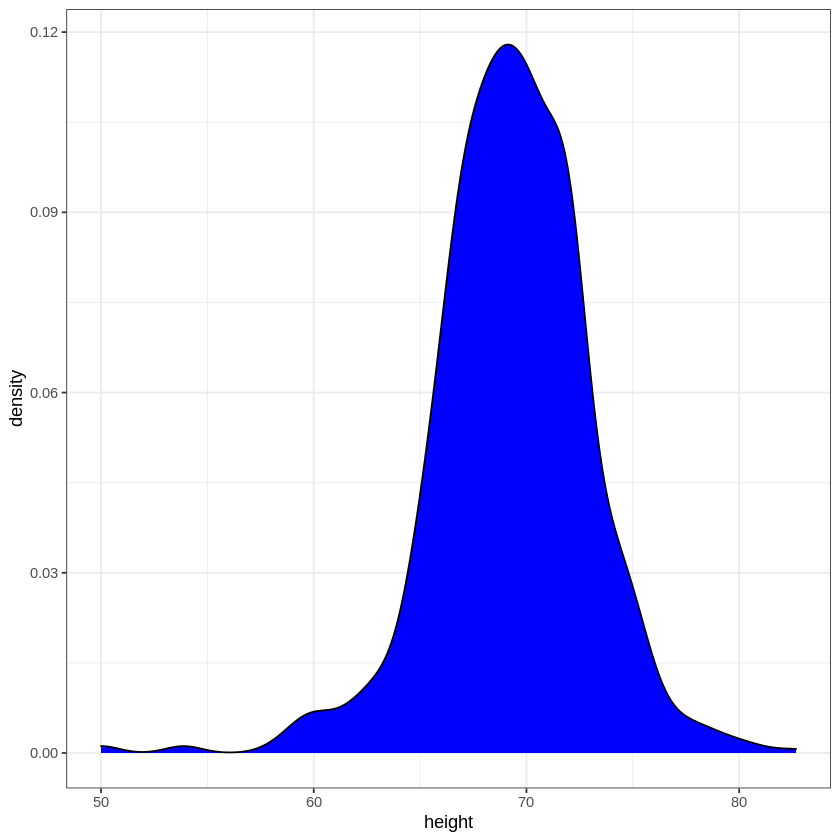

In [62]:
#2. Code: Smooth density plots in ggplot2
p + geom_density()
p + geom_density(fill = "blue")


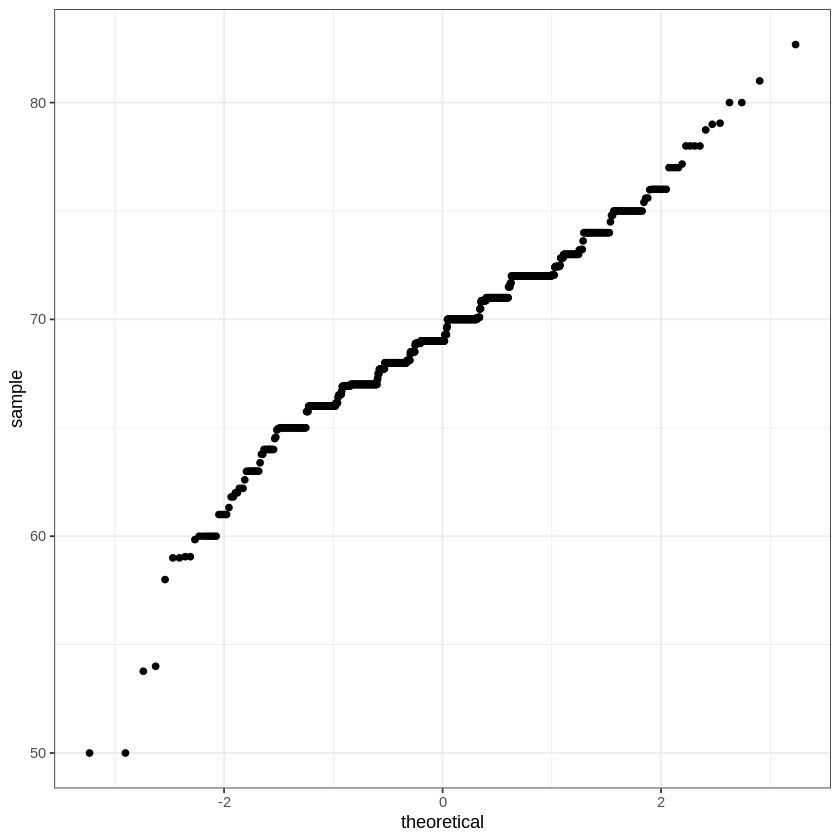

In [63]:
#3. Code: Quantile-quantile plots in ggplot2
# basic QQ-plot
p <- heights %>% filter(sex == "Male") %>%
    ggplot(aes(sample = height))
p + geom_qq()


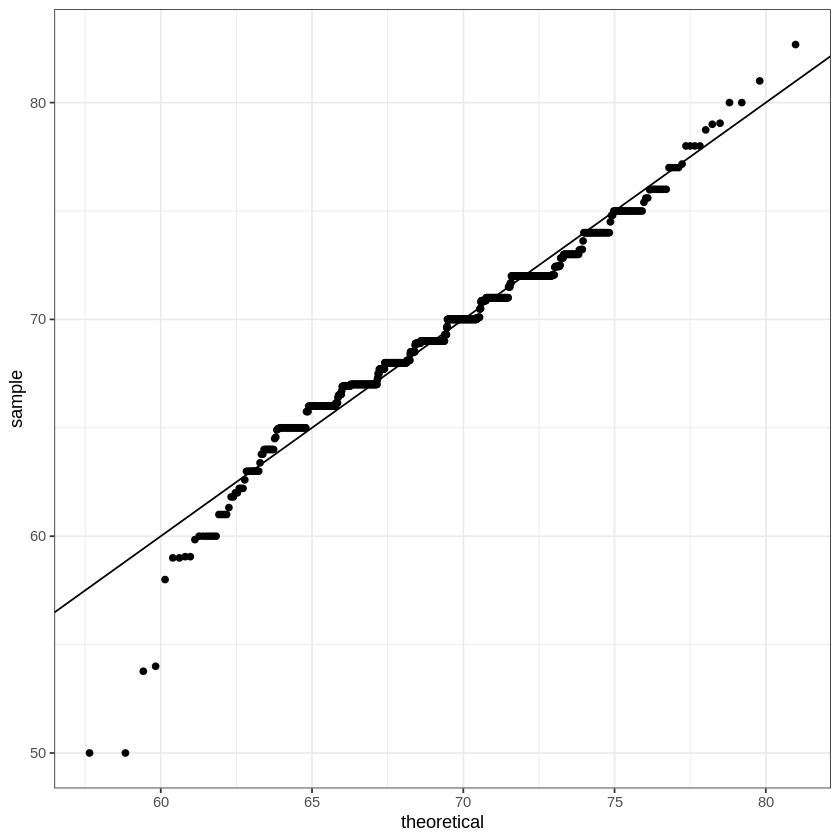

In [64]:
# QQ-plot against a normal distribution with same mean/sd as data
params <- heights %>%
    filter(sex == "Male") %>%
    summarize(mean = mean(height), sd = sd(height))
    p + geom_qq(dparams = params) +
    geom_abline()


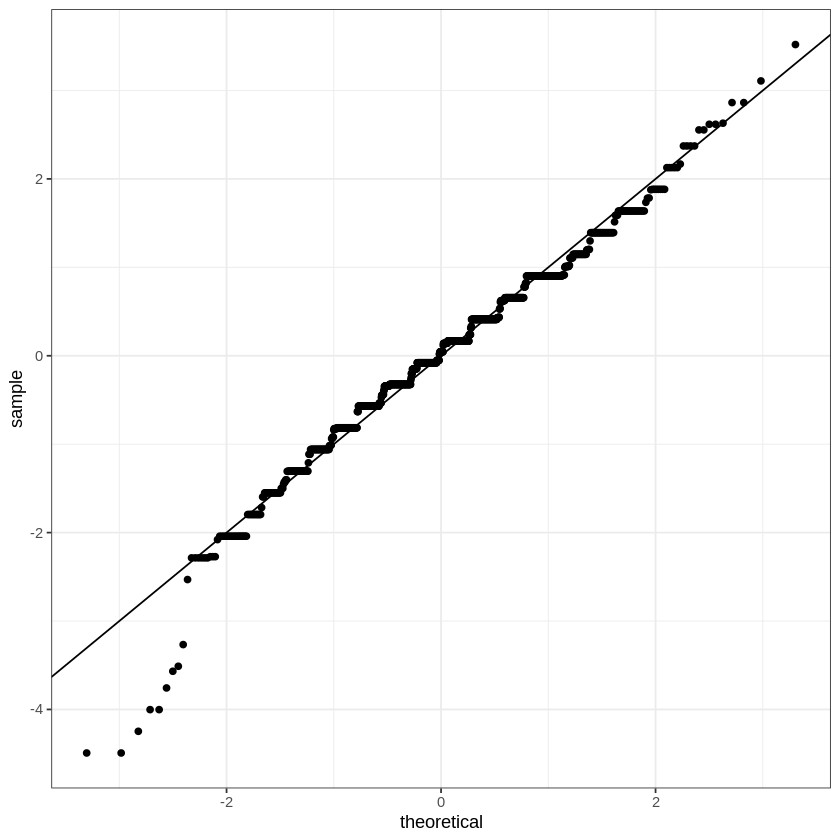

In [65]:
    
# QQ-plot of scaled data against the standard normal distribution
heights %>%
    ggplot(aes(sample = scale(height))) +
    geom_qq() +
    geom_abline()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




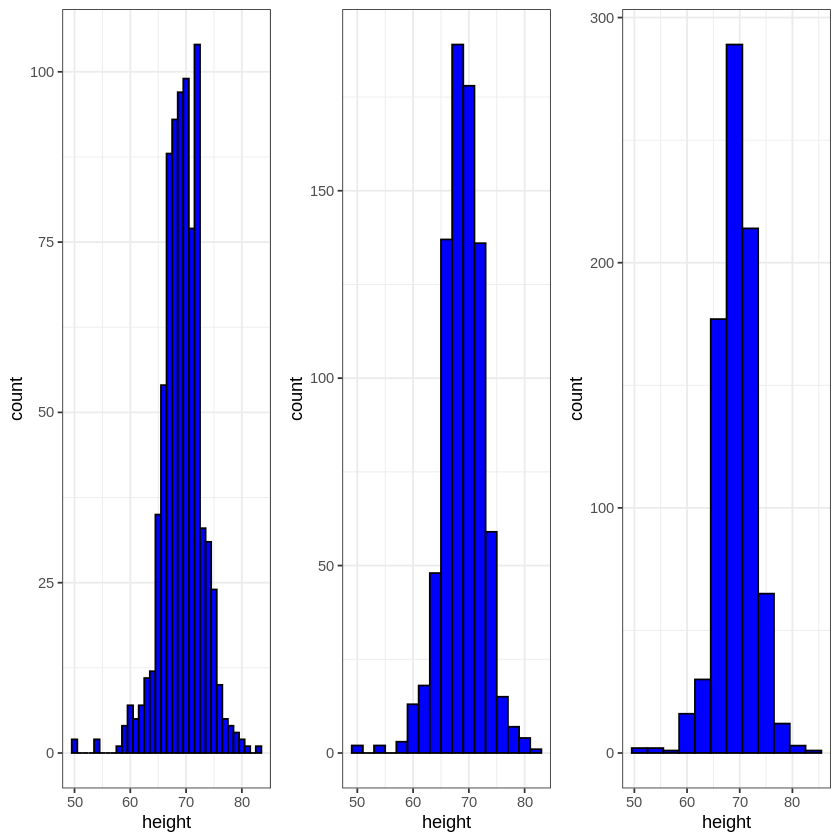

In [68]:
#4. Code: Grids of plots with the gridExtra package
# define plots p1, p2, p3
p <- heights %>% filter(sex == "Male") %>% ggplot(aes(x = height))
p1 <- p + geom_histogram(binwidth = 1, fill = "blue", col = "black")
p2 <- p + geom_histogram(binwidth = 2, fill = "blue", col = "black")
p3 <- p + geom_histogram(binwidth = 3, fill = "blue", col = "black")

# arrange plots next to each other in 1 row, 3 columns
install.packages("gridExtra")
library(gridExtra)
grid.arrange(p1, p2, p3, ncol = 3)